In [30]:
import selenium.webdriver
import pandas as pd

In [81]:
#was getting the error message "'chromedriver' executable needs to be in PATH"
#solution found here:
#https://stackoverflow.com/questions/29858752/error-message-chromedriver-executable-needs-to-be-available-in-the-path
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
driver = webdriver.Chrome(ChromeDriverManager().install())


Checking for win32 chromedriver:2.46 in cache
Driver found in C:\Users\cdr42\.wdm\chromedriver\2.46\win32/chromedriver.exe


In [82]:
#getting the correct web page
driver.get('https://nextgenstats.nfl.com/stats/passing')

In [87]:
#getting the HTML xpath of the passing data
table = driver.find_element_by_xpath('//*[@id="stats-passing-view"]/div[3]').get_attribute('outerHTML')

In [112]:
#reading in the html
passing = pd.read_html(table)

In [114]:
#[0] only gives me column names
bad = passing[0]
bad

,PLAYER NAME,TEAM,TTTime To Throw (TT),CAYAverage Completed Air Yards (CAY),IAYAverage Intended Air Yards (IAY),AYDAverage Air Yards Differential (AYD),AGG%Aggressiveness (AGG%),LCADLongest Completed Air Distance (LCAD),AYTSAir Yards to the Sticks (AYTS),ATTPassing Attempts (ATT),YDSPassing Yards (YDS),TDPassing Touchdowns (TD),INTInterceptions (INT),RATEPasser Rating (RATE),COMP%Completion Percentage (COMP%),xCOMP%Expected Completion Percentage,+/-Completion Percentage Above Expectation,Unnamed: 17
0,PLAYER NAME,TEAM,TTTime To Throw (TT),CAYAverage Completed Air Yards (CAY),IAYAverage Intended Air Yards (IAY),AYDAverage Air Yards Differential (AYD),AGG%Aggressiveness (AGG%),LCADLongest Completed Air Distance (LCAD),AYTSAir Yards to the Sticks (AYTS),ATTPassing Attempts (ATT),YDSPassing Yards (YDS),TDPassing Touchdowns (TD),INTInterceptions (INT),RATEPasser Rating (RATE),COMP%Completion Percentage (COMP%),xCOMP%Expected Completion Percentage,+/-Completion Percentage Above Expectation,NaN


In [115]:
#data and column names seem to be stored in 2 separate data frames, so I need to clean it up
passing = passing[1]
passing.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Ben Roethlisberger,PIT,2.55,4.8,7.7,-2.9,16.7,52.9,-0.9,675,5130,34,16,96.5,67.0,66.9,0.1
1,Patrick Mahomes,KC,2.91,6.4,9.2,-2.8,12.2,60.7,0.2,580,5097,50,12,113.8,66.0,64.3,1.7
2,Matt Ryan,ATL,2.68,6.5,8.5,-2.0,16.8,54.9,-0.5,608,4924,35,8,107.4,69.4,64.8,4.6
3,Jared Goff,LAR,2.94,7.0,8.8,-1.8,13.2,62.7,0.1,561,4688,32,12,101.1,64.9,63.9,1.0
4,Andrew Luck,IND,2.63,6.1,7.6,-1.5,18.2,51.7,-1.2,639,4593,39,15,98.7,67.3,66.6,0.7


In [121]:
#adding in the correct column names
passing.rename(columns={0: 'PLAYER NAME', 1: 'TEAM', 2: 'TT', 3: 'CAY', 4: 'IAY', 5: 'AYD', 6: 'AGG%', 7: 'LCAD',
                       8:'AYTS', 9: 'ATT', 10: 'YDS', 11: 'TD', 12: 'INT', 13: 'RATE', 14: 'COMP%', 
                       15: 'xCOMP%', 16: '+/-'}, inplace=True)
passing.head(2)

,PLAYER NAME,TEAM,TT,CAY,IAY,AYD,AGG%,LCAD,AYTS,ATT,YDS,TD,INT,RATE,COMP%,xCOMP%,+/-
0,Ben Roethlisberger,PIT,2.55,4.8,7.7,-2.9,16.7,52.9,-0.9,675,5130,34,16,96.5,67.0,66.9,0.1
1,Patrick Mahomes,KC,2.91,6.4,9.2,-2.8,12.2,60.7,0.2,580,5097,50,12,113.8,66.0,64.3,1.7


In [122]:
#printing the full dataset to compare with the real dataset
passing
# link to actual https://nextgenstats.nfl.com/stats/passing

,PLAYER NAME,TEAM,TT,CAY,IAY,AYD,AGG%,LCAD,AYTS,ATT,YDS,TD,INT,RATE,COMP%,xCOMP%,+/-
0,Ben Roethlisberger,PIT,2.55,4.8,7.7,-2.9,16.7,52.9,-0.9,675,5130,34,16,96.5,67.0,66.9,0.1
1,Patrick Mahomes,KC,2.91,6.4,9.2,-2.8,12.2,60.7,0.2,580,5097,50,12,113.8,66.0,64.3,1.7
2,Matt Ryan,ATL,2.68,6.5,8.5,-2.0,16.8,54.9,-0.5,608,4924,35,8,107.4,69.4,64.8,4.6
3,Jared Goff,LAR,2.94,7.0,8.8,-1.8,13.2,62.7,0.1,561,4688,32,12,101.1,64.9,63.9,1.0
4,Andrew Luck,IND,2.63,6.1,7.6,-1.5,18.2,51.7,-1.2,639,4593,39,15,98.7,67.3,66.6,0.7
5,Aaron Rodgers,GB,2.95,6.0,8.8,-2.8,13.7,61.4,-0.2,597,4442,25,2,97.6,62.3,62.9,-0.6
6,Tom Brady,NE,2.61,5.6,7.6,-2.0,13.9,49.9,-1.1,570,4355,29,11,97.7,65.8,67.7,-1.9
7,Philip Rivers,LAC,2.62,6.3,7.9,-1.6,15.7,55.3,-1.1,508,4308,32,12,105.5,68.3,66.2,2.1
8,Eli Manning,NYG,2.65,5.3,7.2,-1.9,18.8,55.4,-2.0,576,4299,21,11,92.4,66.0,67.4,-1.4
9,Kirk Cousins,MIN,2.74,5.6,7.4,-1.9,13.0,62.9,-1.2,606,4298,30,10,99.7,70.1,64.8,5.3


In [123]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'xComp% +/-')

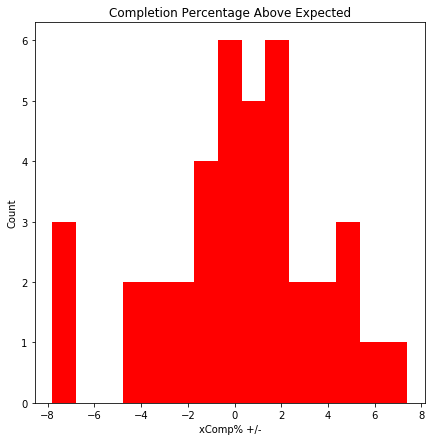

In [136]:
#Quick look at the distribution of completion above expected 
plt.figure(figsize=(7,7))
plt.hist(passing['+/-'], bins = 15, color = 'r')
plt.title("Completion Percentage Above Expected")
plt.ylabel('Count')
plt.xlabel('xComp% +/-')